In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from EDA.panel_vis import plot_response_var
from EDA.panel_vis import plot_response_independent_series
from EDA.panel_vis import plt_two_indicators
from EDA.panel_vis import calc_statistics

from feature_engineering.feature_engineering import calc_changes
from feature_engineering.feature_engineering import generate_lagged_features
from feature_engineering.feature_engineering import generate_ema_features

from feature_engineering.find_time_lags import calc_lags

In [3]:
# Time series analysis
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

## Loading Data

In [4]:
response_var = pd.read_csv('df_response_vars.csv')

In [5]:
macro_indicators = pd.read_csv('Combined_Macro_Econ.csv')

In [6]:
macro_indicators.rename(columns={'Market Volatility\nIndex': 'Market Volatility Index'}, inplace=True)

In [7]:
data_set = response_var.merge(macro_indicators, how='left', left_on='Report Date', right_on='Date')

## Adding Columns to Represent Changes in Macroeconomic Variables

In [8]:
# Define a dictionary to specify the macroeconomic variables for which changes need to be estimated and 
# specifying whether these changes should be absolute or relative
factors_dic = {'Unemployment rate': 'absolute',
               'Dow Jones Total Stock Market Index': 'relative',
               'BBB corporate yield': 'absolute',
               '3-month Treasury rate': 'absolute',
               '5-year Treasury yield': 'absolute',
               '10-year Treasury yield': 'absolute',
               'House Price Index': 'relative',
               'Commercial Real Estate Price Index': 'relative',
               'Market Volatility Index': 'relative',
               }

In [9]:
# Add columns to represent changes in macro indicators
macro_indicators = calc_changes(macro_indicators, factors_dic, shift=4)

## Comparing Time Series Data of the Dependent Variable and Macroeconomic Indicators

The feature selection process was started with plotting the time series of the response variable and macroeconomic indicators to identify indicators whose dynamics align with the response variable. To facilitate this procedure, a plotting function with adjustable parameters like “sign”, “lag”, and “com” (center of mass parameter for exponential moving average) was developed. These parameters could be fine-tuned to observe the changes in macroeconomic time series and determine the optimal lag and “com”.

In [10]:
# Name of response variable
fin_variable = 'Provision for Loan Lease Losses as % of Aver. Assets'

### Real GDP growth

In [11]:
macro_variable = 'Real GDP growth'

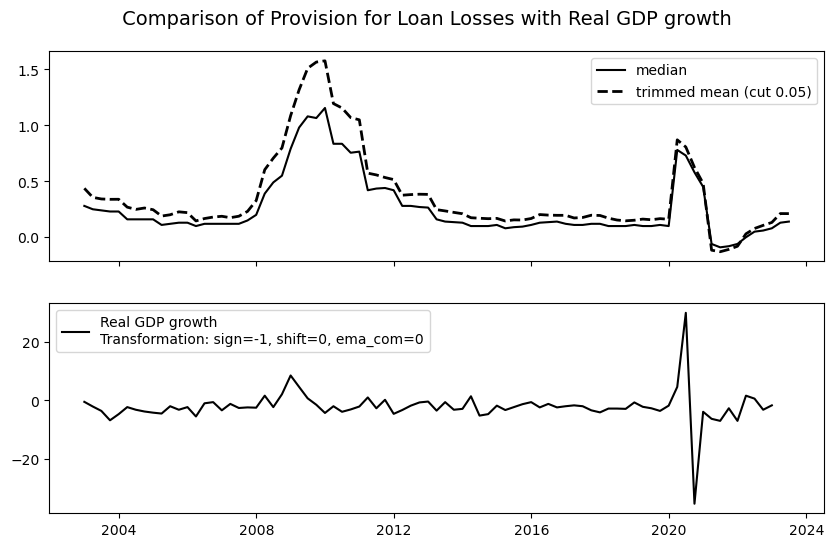

In [12]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=0)

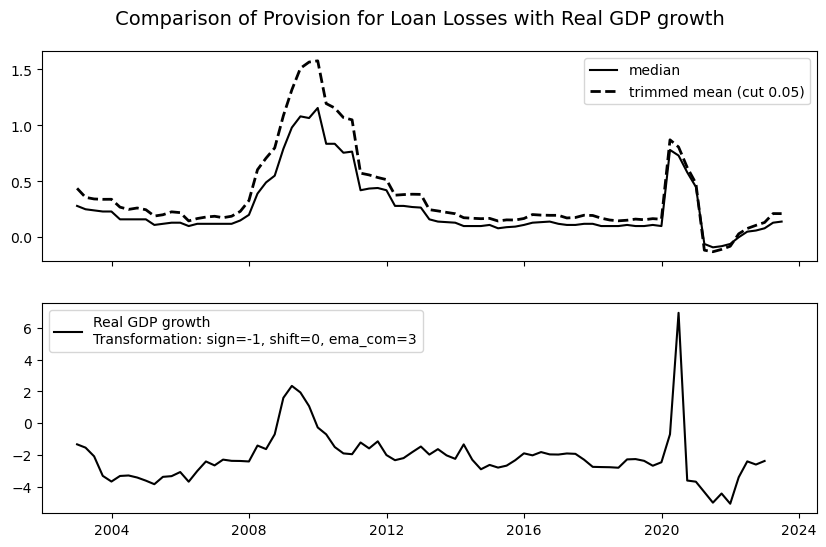

In [13]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=3)

### Nominal GDP growth

In [14]:
macro_variable = 'Nominal GDP growth'

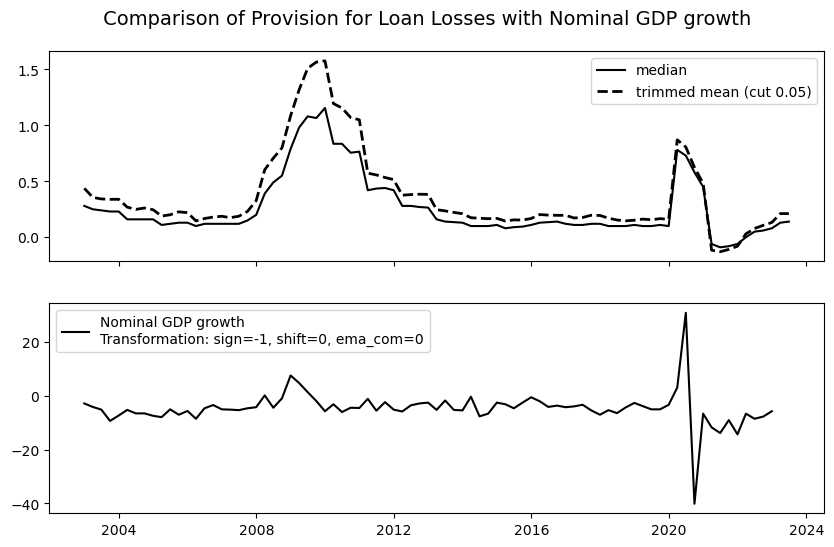

In [15]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=0)

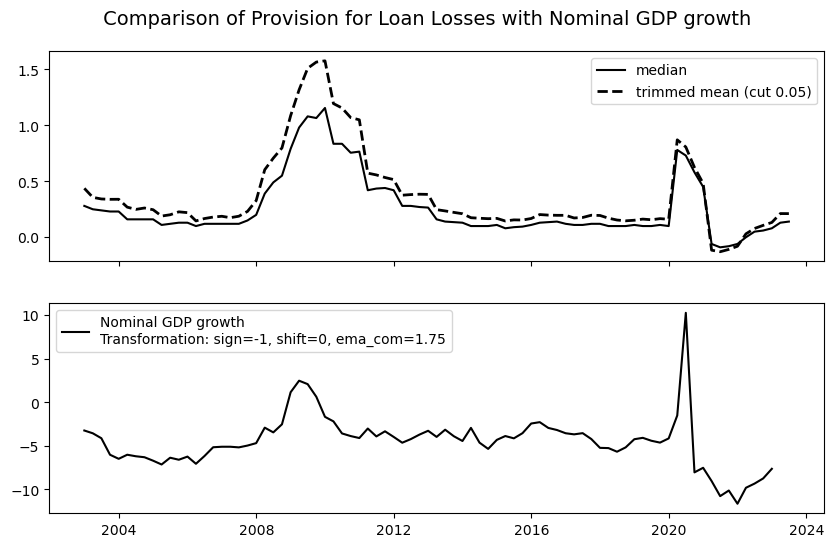

In [16]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=1.75)

### Real disposable income growth

In [17]:
macro_variable = 'Real disposable income growth'

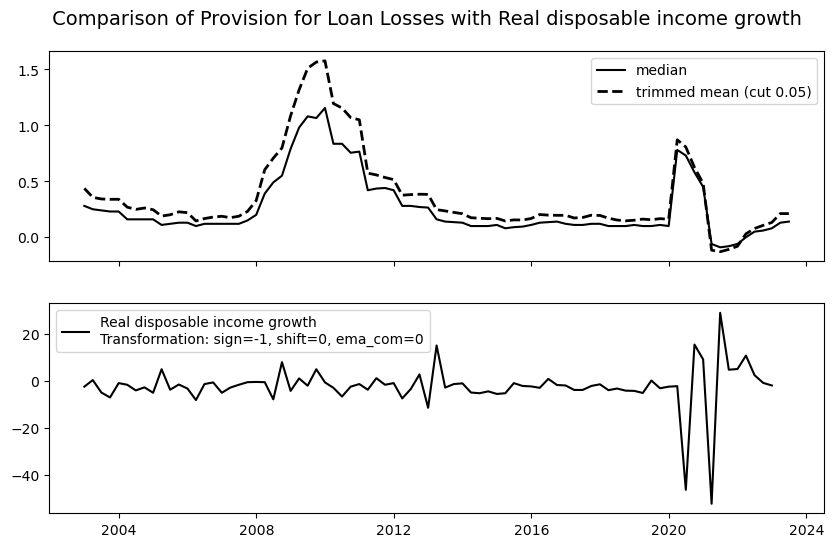

In [18]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=0)

### Nominal disposable income growth

In [19]:
macro_variable = 'Nominal disposable income growth'

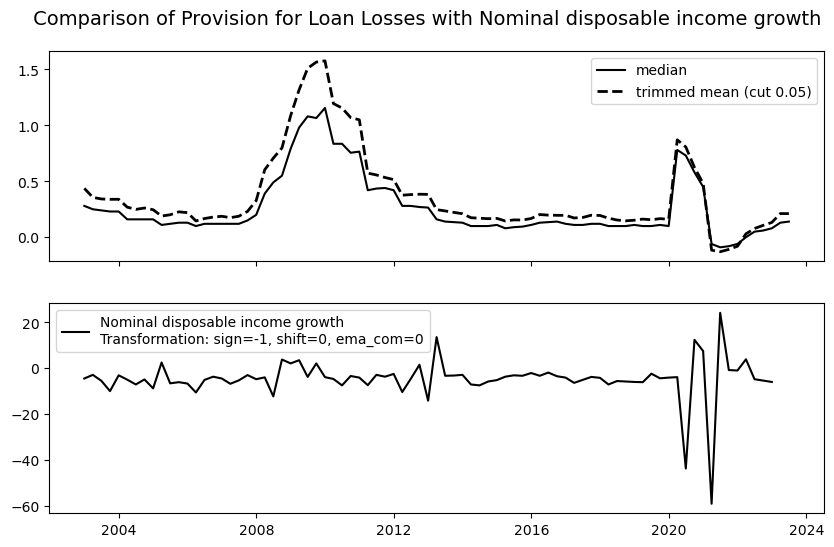

In [20]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=0)

### Unemployment rate

In [21]:
macro_variable = 'Unemployment rate'

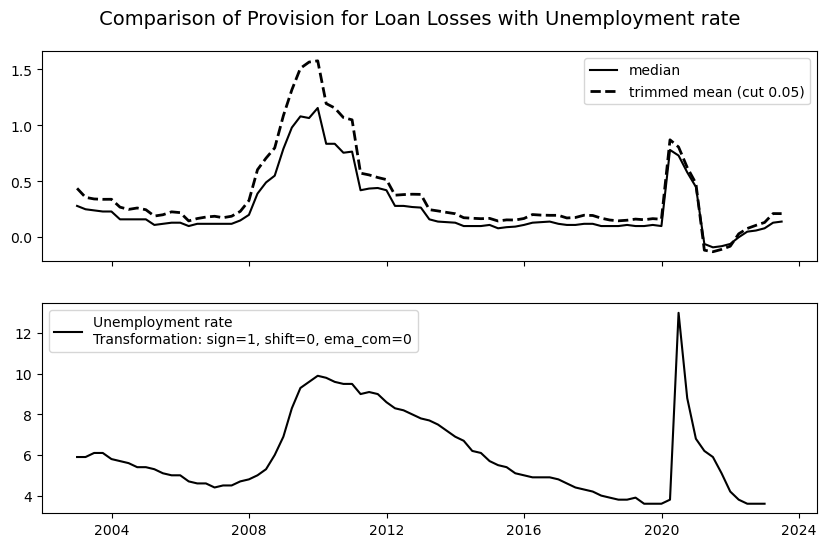

In [22]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=0, ema_com=0)

### Unemployment rate change

In [23]:
macro_variable = 'Unemployment rate change'

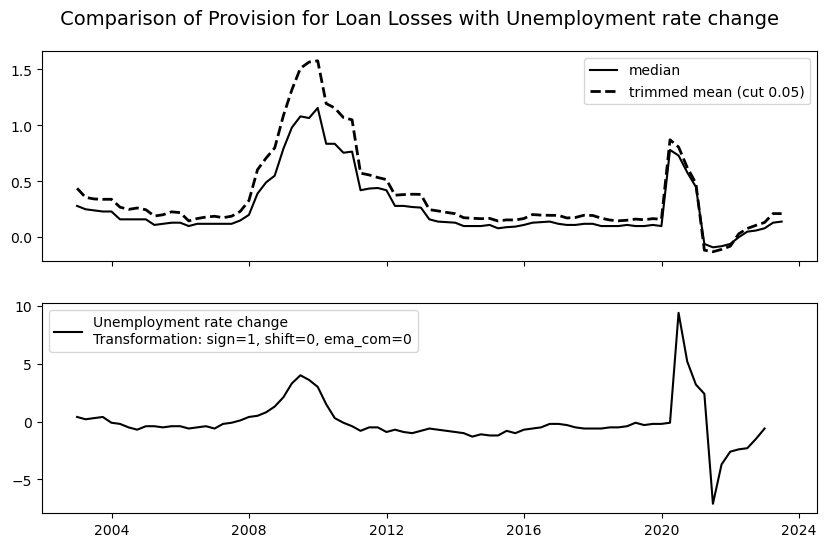

In [24]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=0, ema_com=0)

### CPI inflation rate

In [25]:
macro_variable = 'CPI inflation rate'

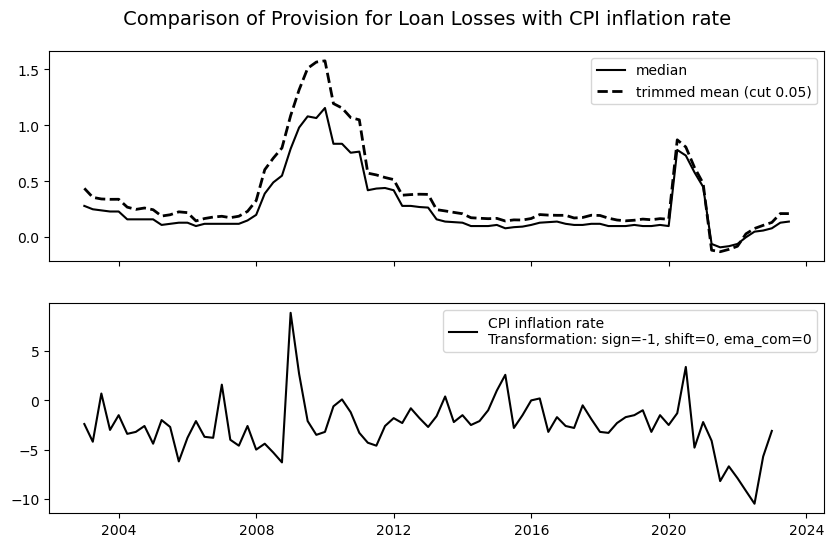

In [26]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=0)

### 3-month Treasury rate

In [27]:
macro_variable = '3-month Treasury rate'

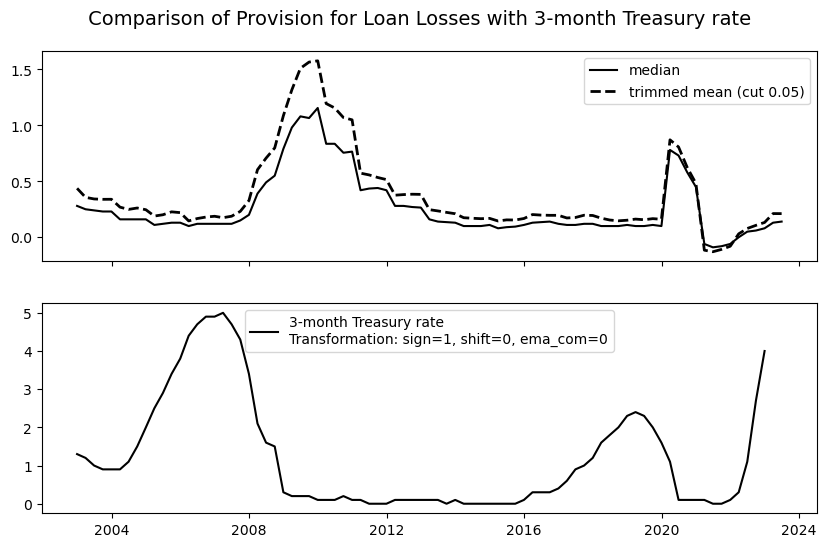

In [28]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=0, ema_com=0)

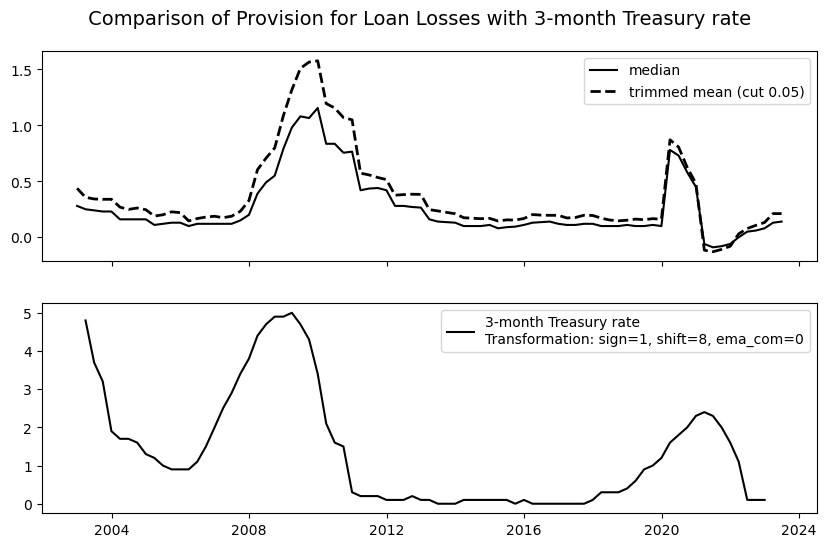

In [29]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=8, ema_com=0)

### 3-month Treasury rate change

In [30]:
macro_variable = '3-month Treasury rate change'

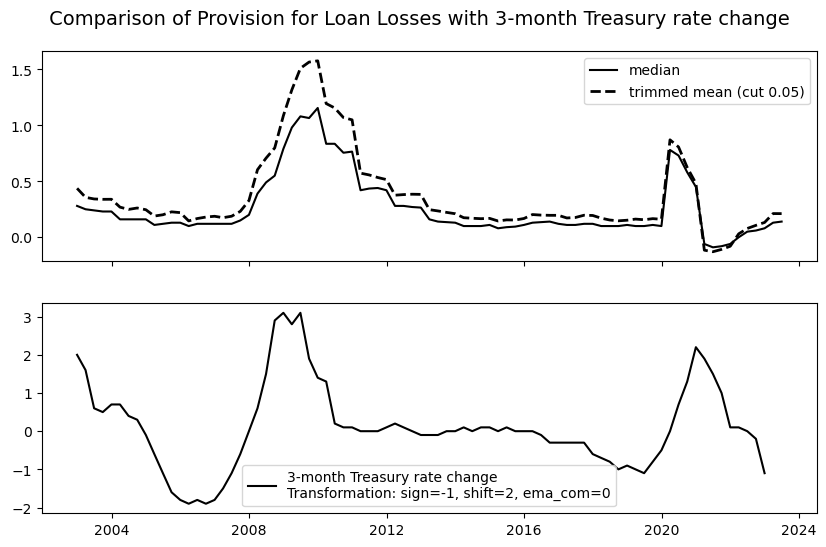

In [31]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=2, ema_com=0)

### 5-year Treasury yield

In [32]:
macro_variable = '5-year Treasury yield'

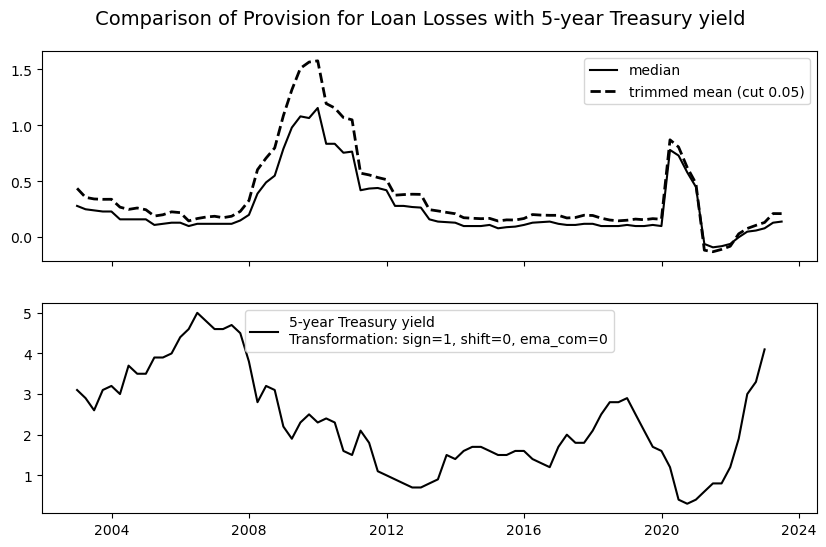

In [33]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=0, ema_com=0)

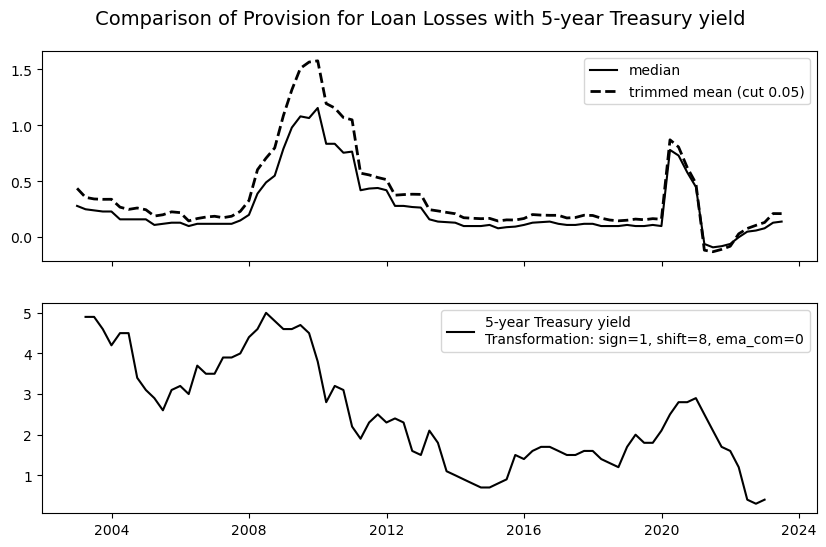

In [34]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=8, ema_com=0)

### 5-year Treasury yield change

In [35]:
macro_variable = '5-year Treasury yield change'

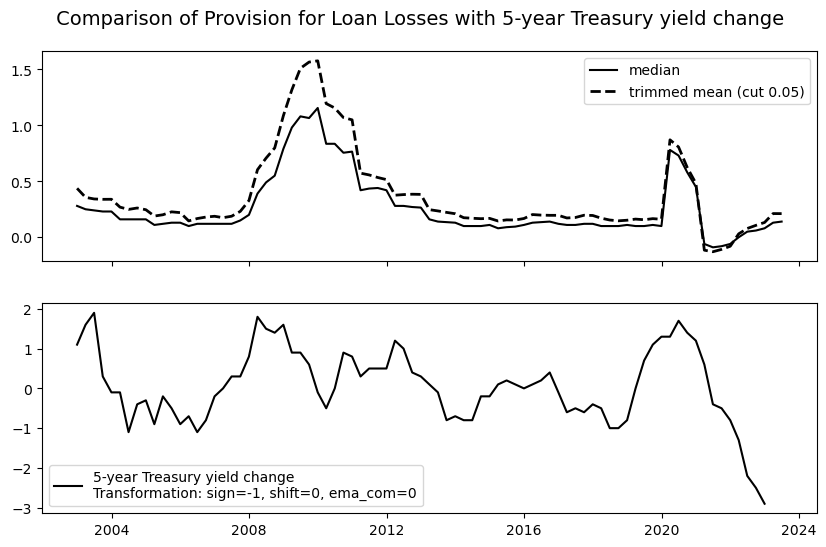

In [36]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=0)

### 10-year Treasury yield

In [37]:
macro_variable = '10-year Treasury yield'

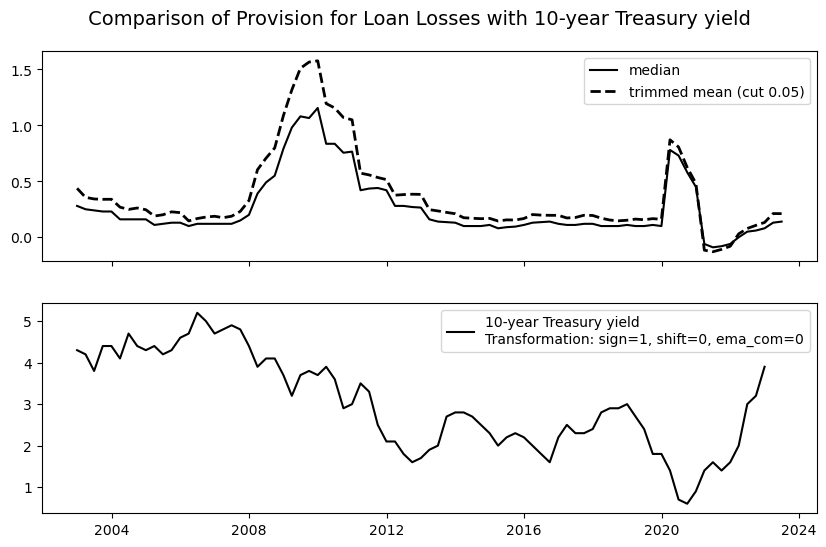

In [38]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=0, ema_com=0)

### 10-year Treasury yield change

In [39]:
macro_variable = '10-year Treasury yield change'

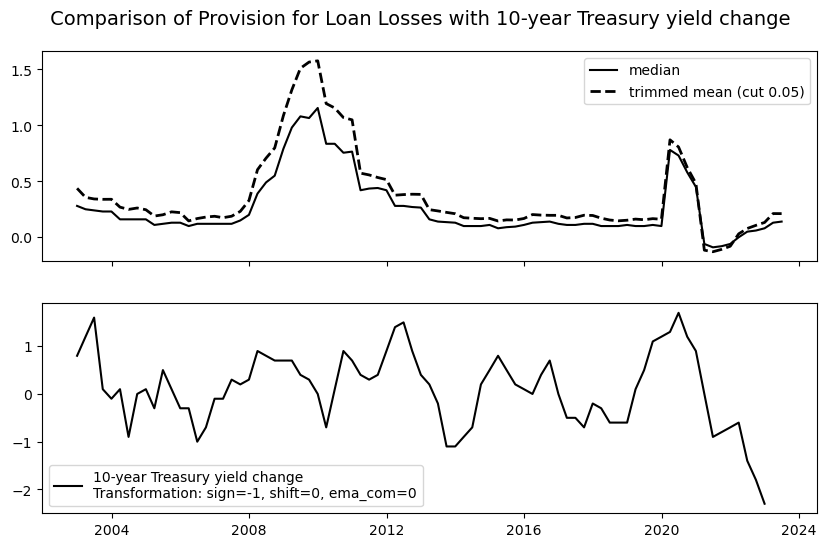

In [40]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=0)

### BBB corporate yield

In [41]:
macro_variable = 'BBB corporate yield'

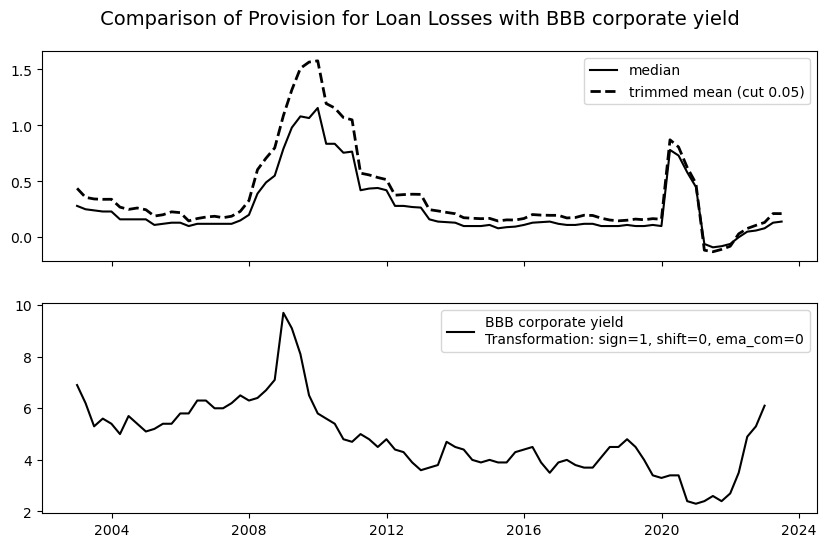

In [42]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=0, ema_com=0)

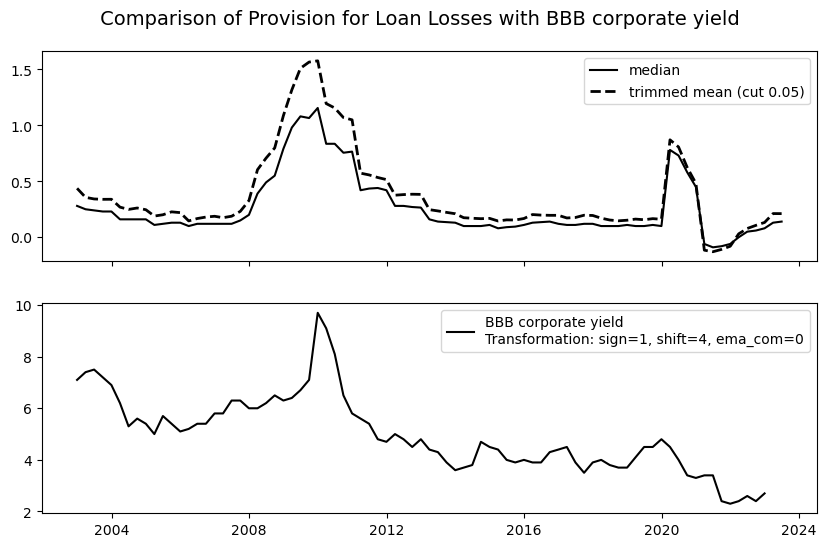

In [43]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=4, ema_com=0)

### BBB corporate yield change

In [44]:
macro_variable = 'BBB corporate yield change'

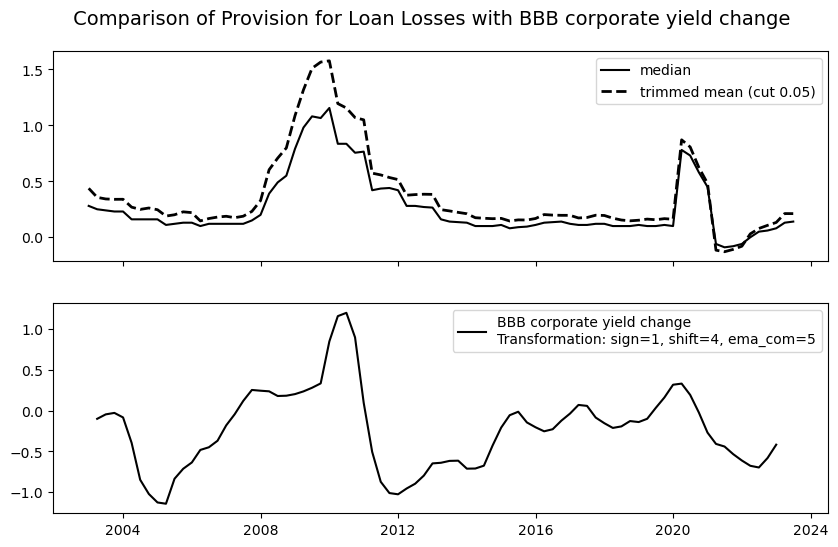

In [45]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=4, ema_com=5)

### Mortgage rate

In [46]:
macro_variable = 'Mortgage rate'

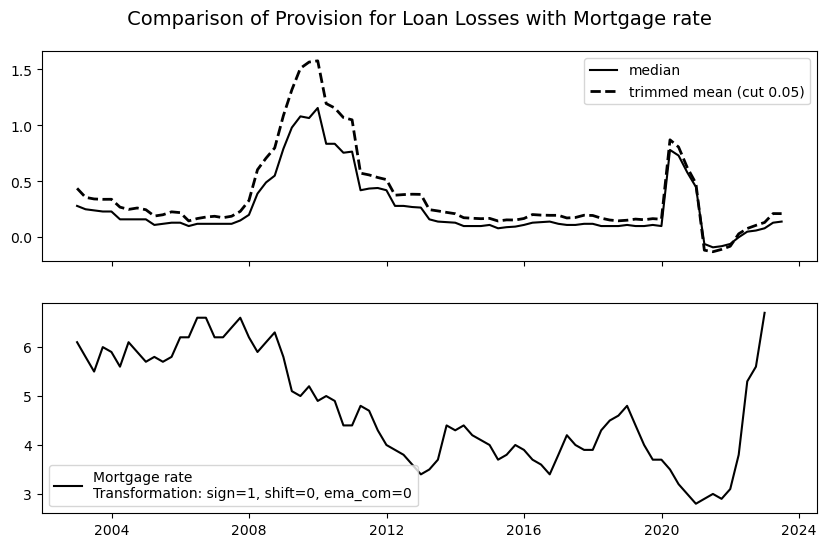

In [47]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=0, ema_com=0)

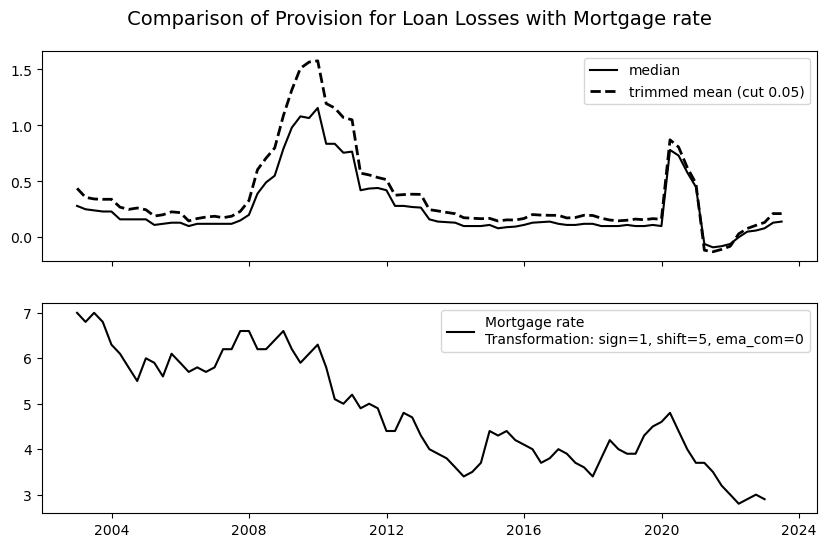

In [48]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=5, ema_com=0)

### Prime rate

In [49]:
macro_variable = 'Prime rate'

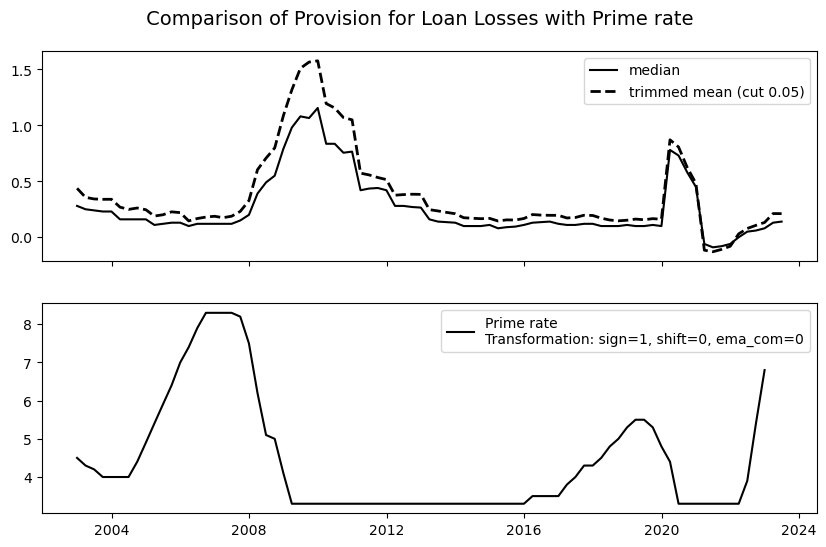

In [50]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=0, ema_com=0)

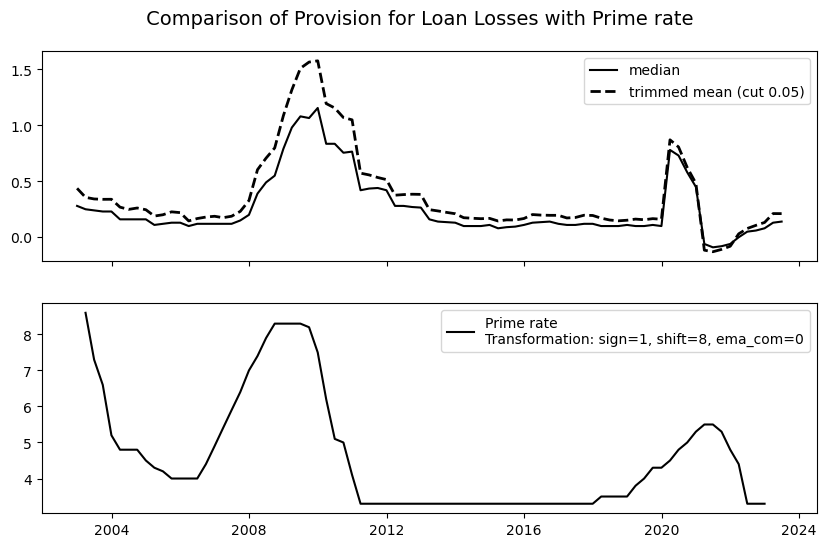

In [51]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=8, ema_com=0)

### Dow Jones Total Stock Market Index

In [52]:
macro_variable = 'Dow Jones Total Stock Market Index'

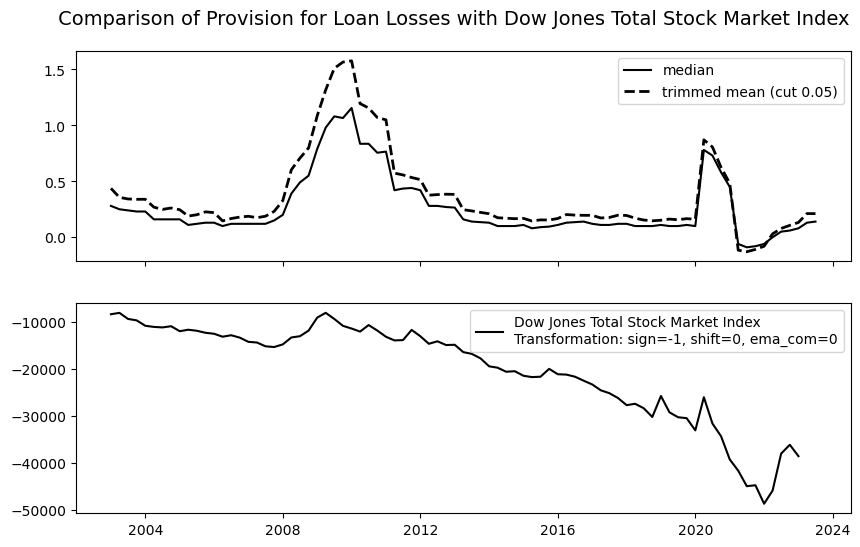

In [53]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=0)

### Dow Jones Total Stock Market Index Change

In [54]:
macro_variable = 'Dow Jones Total Stock Market Index change'

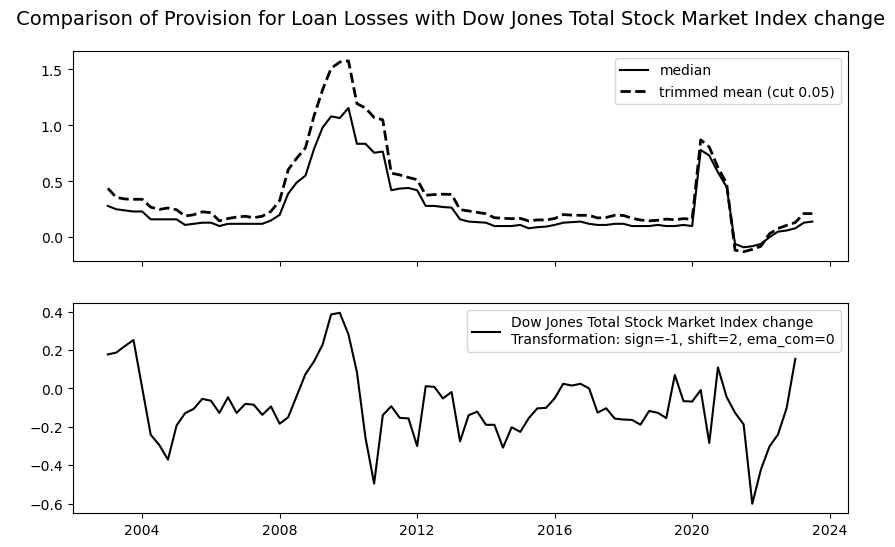

In [55]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=2, ema_com=0)

### House Price Index

In [56]:
macro_variable = 'House Price Index'

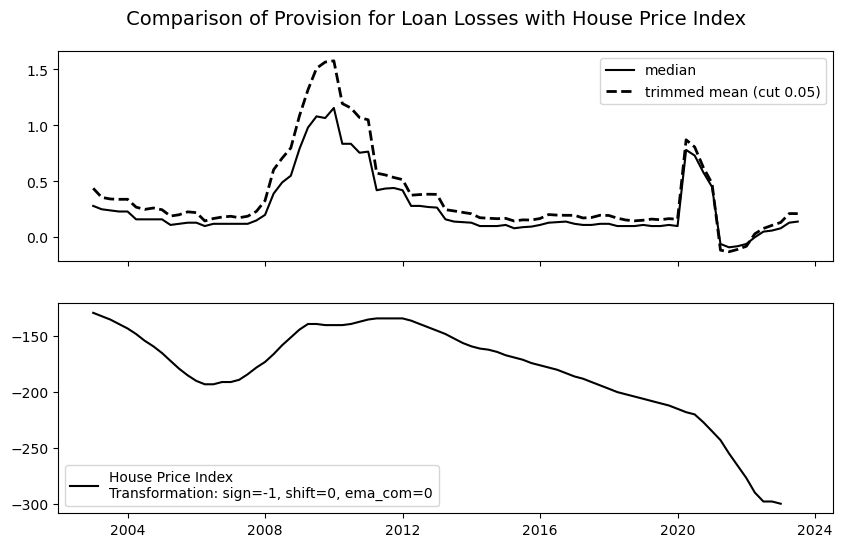

In [57]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=0)

### House Price Index Change

In [58]:
macro_variable = 'House Price Index change'

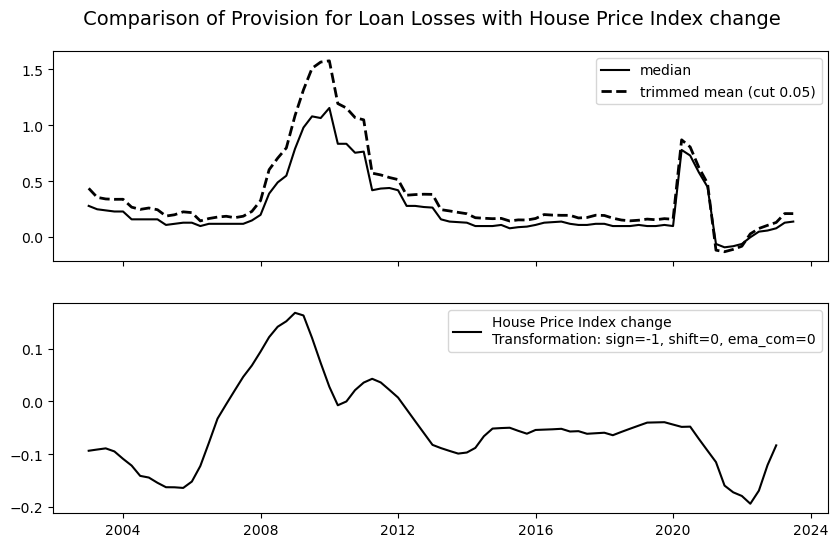

In [59]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=0)

### Commercial Real Estate Price Index

In [60]:
macro_variable = 'Commercial Real Estate Price Index'

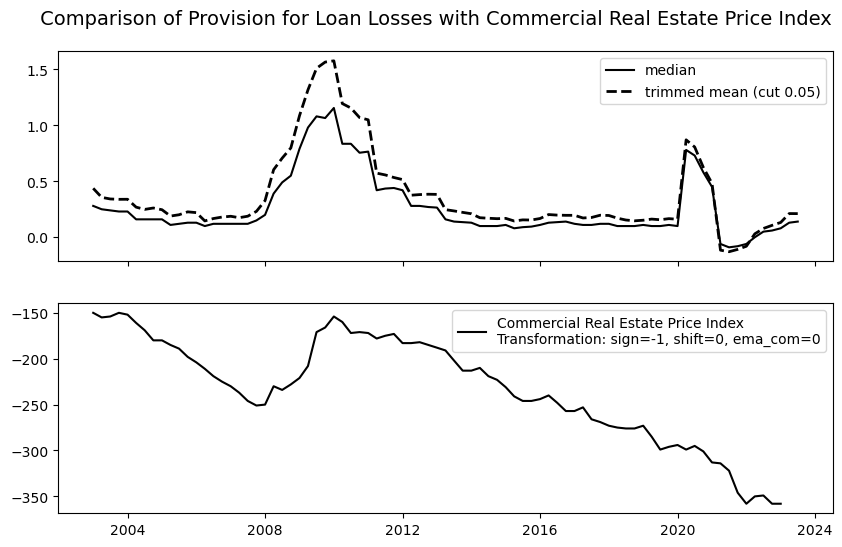

In [61]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=0)

### Commercial Real Estate Price Index change

In [62]:
macro_variable = 'Commercial Real Estate Price Index change'

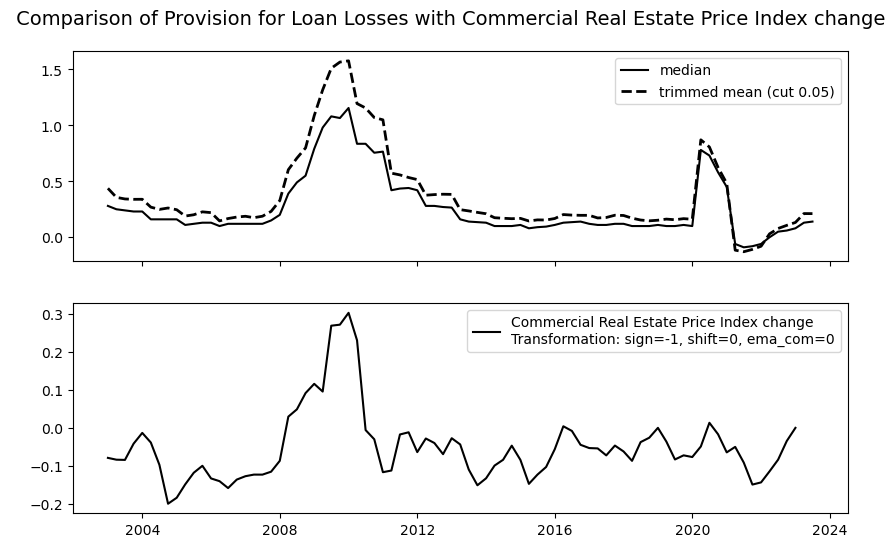

In [63]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=-1, shift=0, ema_com=0)

### Market Volatility Index

In [64]:
macro_variable = 'Market Volatility Index'

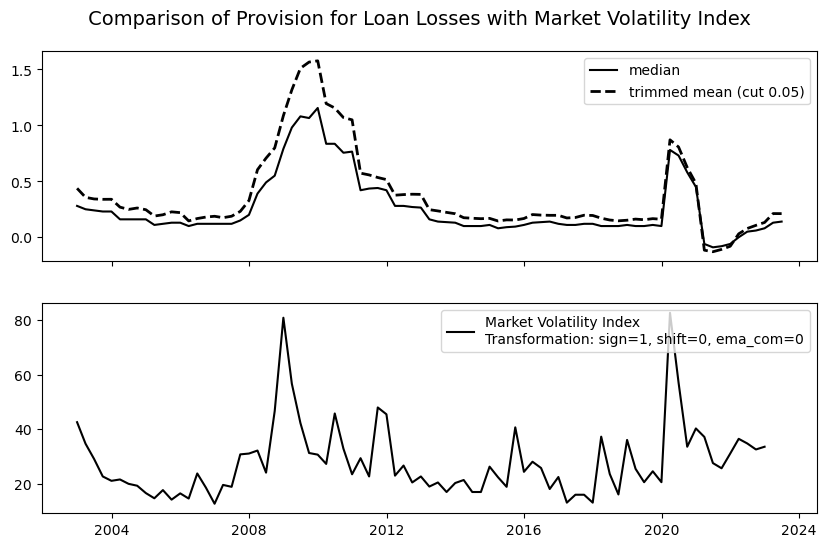

In [65]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=0, ema_com=0)

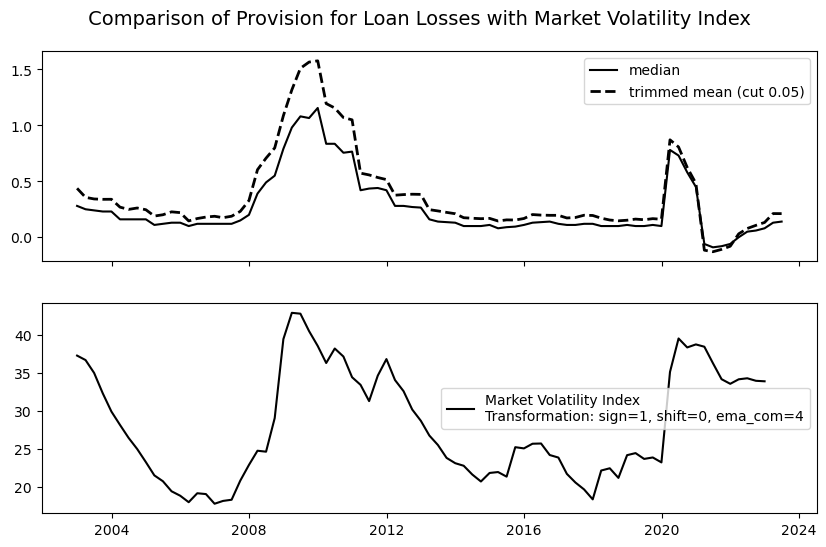

In [66]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=0, ema_com=4)

### Market Volatility Index Change

In [67]:
macro_variable = 'Market Volatility Index change'

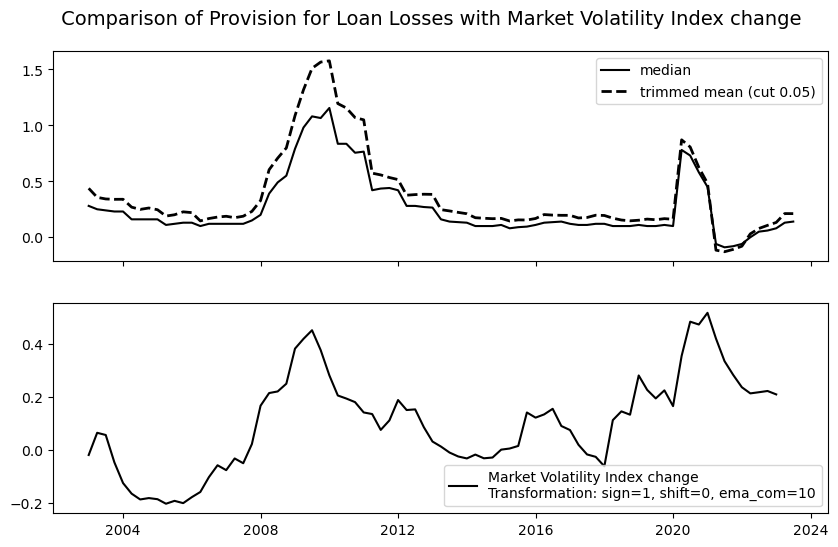

In [68]:
plot_response_independent_series(data_set, macro_indicators, 
                                 fin_variable, macro_variable,
                                 sign=1, shift=0, ema_com=10)

## Selected Factors

In [69]:
selected_factors = {
    'Real GDP growth': -1,
    'Nominal GDP growth': -1,
    'Unemployment rate': 1,
    'Unemployment rate change': 1,
    '3-month Treasury rate change': -1,
    'BBB corporate yield': 1,
    'BBB corporate yield change': 1,
    'Dow Jones Total Stock Market Index change': -1,
    'Commercial Real Estate Price Index change': -1,
    'Market Volatility Index': 1,
    'Market Volatility Index change': 1,
    
}

factors_df = pd.DataFrame.from_dict(selected_factors, orient='index', columns=['sign'])
factors_df

,sign
Real GDP growth,-1
Nominal GDP growth,-1
Unemployment rate,1
Unemployment rate change,1
3-month Treasury rate change,-1
BBB corporate yield,1
BBB corporate yield change,1
Dow Jones Total Stock Market Index change,-1
Commercial Real Estate Price Index change,-1
Market Volatility Index,1


## Determining Time Lag For Macroeconomic indicators

Time lags between the response variable and macroeconomic indicators are estimated as the delays between the extreme points of the response variable and the corresponding macroeconomic indicators. These time lags are determined within the context of the 2008-2009 financial crisis timeframe.

For instance, consider the chosen response variable, "Provision for Loan Lease Losses as % of Average Assets," which reached its peak on 2009-12-31. During the 2008-2009 crisis, the macro indicator "Real GDP growth" recorded its lowest value on 2008-12-31. The estimated time lag between these variables is one year or four quarters.

In [70]:
start_date = '2007-12-31'
end_date = '2009-12-31'

In [71]:
factors_df = calc_lags(response_var, macro_indicators, fin_variable, factors_df, start_date, end_date)
factors_df

,sign,lag quarters,factor group
Real GDP growth,-1,4.0,Real GDP growth
Nominal GDP growth,-1,4.0,Nominal GDP growth
Unemployment rate,1,0.0,Unemployment rate
Unemployment rate change,1,2.0,Unemployment rate change
3-month Treasury rate change,-1,6.0,3-month Treasury rate change
BBB corporate yield,1,4.0,BBB corporate yield
BBB corporate yield change,1,4.0,BBB corporate yield change
Dow Jones Total Stock Market Index change,-1,3.0,Dow Jones Total Stock Market Index change
Commercial Real Estate Price Index change,-1,0.0,Commercial Real Estate Price Index change
Market Volatility Index,1,4.0,Market Volatility Index


## Create new features by incorporating lagged values of macroeconomic indicators and by calculating their exponential moving averages

### New features: Macroeconomic indicators with time lags

In [72]:
macro_features, new_factors_df = generate_lagged_features(macro_indicators, factors_df)

### New features: Exponential moving averages of macroeconomic indicators

In [73]:
# Define for what features estimate EMA and with what parameter ema_com
features_ema = {
    'Real GDP growth': 3,
    'Nominal GDP growth': 1.75,
    'Market Volatility Index': 4,
    'Market Volatility Index change': 10,
    
}

In [74]:
macro_features, all_features_df = generate_ema_features(macro_features, features_ema, new_factors_df)

In [75]:
macro_features.tail(3)

,Date,Real GDP growth,Nominal GDP growth,Unemployment rate,Unemployment rate change,3-month Treasury rate change,BBB corporate yield,BBB corporate yield change,Dow Jones Total Stock Market Index change,Commercial Real Estate Price Index change,...,Market Volatility Index_lag3,Market Volatility Index_lag4,Market Volatility Index change_lag1,Market Volatility Index change_lag2,Market Volatility Index change_lag3,Market Volatility Index change_lag4,Real GDP growth_ema3,Nominal GDP growth_ema1.75,Market Volatility Index_ema4,Market Volatility Index change_ema10
85,2022-06-30,-0.6,8.5,3.6,-2.3,1.1,4.9,2.3,-0.154262,0.083851,...,25.7,27.6,-0.018817,-0.228288,-0.235119,-0.516637,2.401811,9.333570,34.259889,0.217107
86,2022-09-30,3.2,7.7,3.6,-1.5,2.7,5.3,2.9,-0.192547,0.034682,...,31.1,25.7,0.260870,-0.018817,-0.228288,-0.235119,2.601358,8.739545,33.927911,0.221779
87,2022-12-31,1.7,5.7,3.6,-0.6,3.9,6.1,3.4,-0.207941,0.000000,...,36.5,31.1,0.268482,0.260870,-0.018817,-0.228288,2.376018,7.634256,33.862329,0.208921


In [76]:
macro_features.to_csv('macro_features.csv', index=False)

### Comparison Macro Indicators with their Exponential Moving Averages

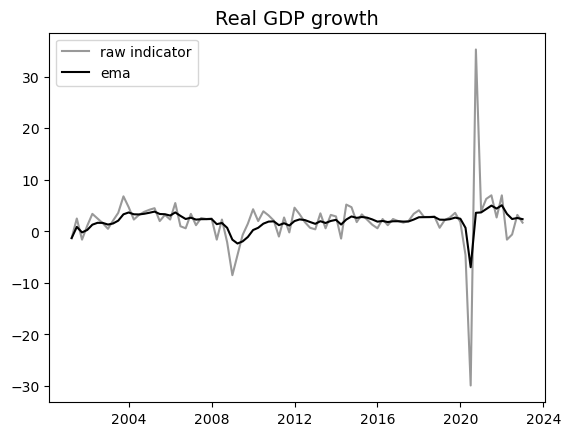

In [77]:
plt_two_indicators(macro_features, 'Real GDP growth', 'Real GDP growth_ema3')

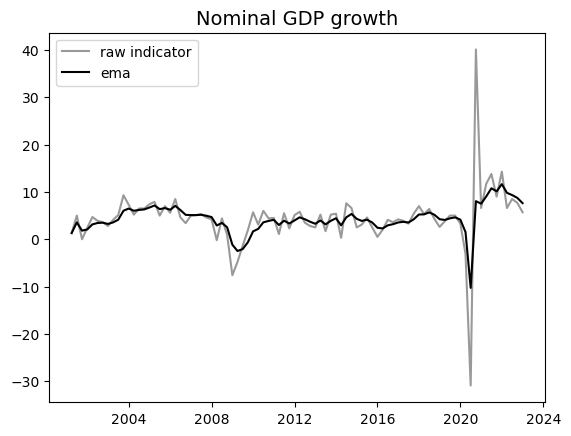

In [78]:
plt_two_indicators(macro_features, 'Nominal GDP growth', 'Nominal GDP growth_ema1.75')

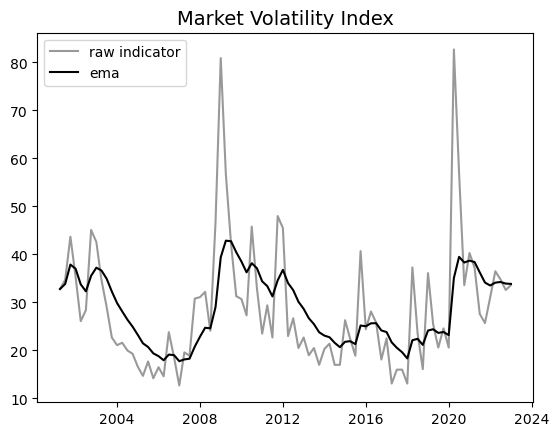

In [79]:
plt_two_indicators(macro_features, 'Market Volatility Index', 'Market Volatility Index_ema4')

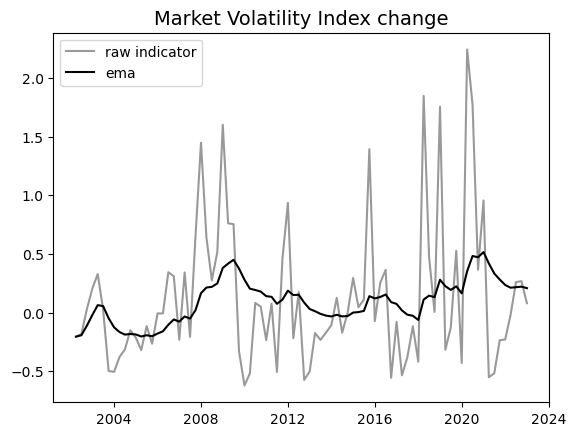

In [80]:
plt_two_indicators(macro_features, 'Market Volatility Index change', 'Market Volatility Index change_ema10')

### The chosen features

In [81]:
all_features_df

,sign,factor group
Real GDP growth,-1,Real GDP growth
Nominal GDP growth,-1,Nominal GDP growth
Unemployment rate,1,Unemployment rate
Unemployment rate change,1,Unemployment rate change
3-month Treasury rate change,-1,3-month Treasury rate change
BBB corporate yield,1,BBB corporate yield
BBB corporate yield change,1,BBB corporate yield change
Dow Jones Total Stock Market Index change,-1,Dow Jones Total Stock Market Index change
Commercial Real Estate Price Index change,-1,Commercial Real Estate Price Index change
Market Volatility Index,1,Market Volatility Index


In [82]:
all_features_df.to_csv('chosen_features.csv')

## Time Series Analysis

### Series for analysis

In [83]:
# Calculate statistics for the response variable
provision_stats = calc_statistics(response_var, fin_variable, proportiontocut=0.2)
mean_provision = provision_stats['trimmed mean']

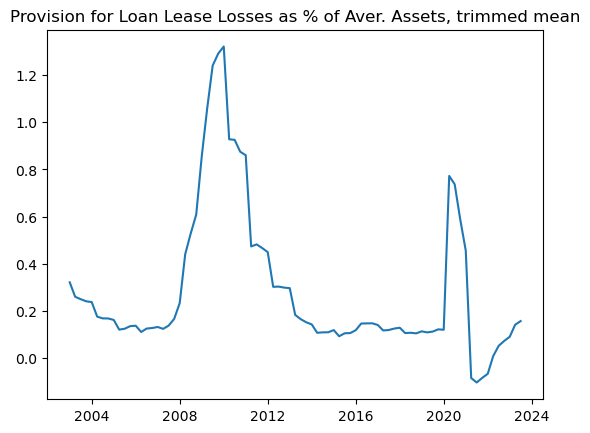

In [84]:
provision_stats.index = pd.to_datetime(provision_stats.index)
plt.plot(provision_stats.index, mean_provision)
plt.title('Provision for Loan Lease Losses as % of Aver. Assets, trimmed mean');

In [85]:
mean_provision_train = mean_provision[mean_provision.index<='2021-12-31']

### Autocorrelation
Autocorrelation can be a valuable tool for determining the appropriate model type, such as whether to use an autocorrelation model or a moving average model. 
The autocovariance function exhibits non-zero values that decay rapidly in an exponential fashion, it suggests that an autocorrelation model is better suited for the data.

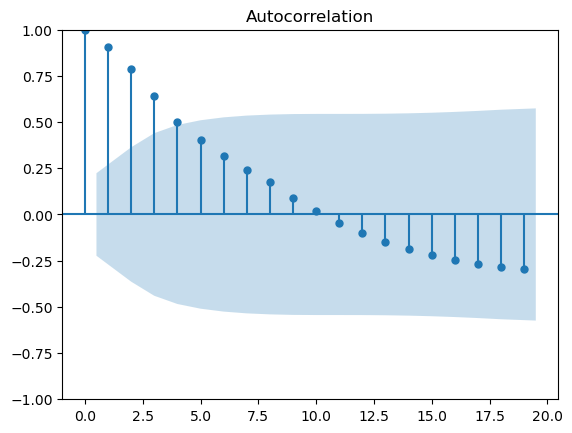

In [86]:
plot_acf(mean_provision_train);

### Partial autocorrelation
The partial autocorrelation plot indicates that there is a significant partial autocorrelation at a lag of one, suggesting that an autocorrelation model with a lag of one is appropriate for the data.

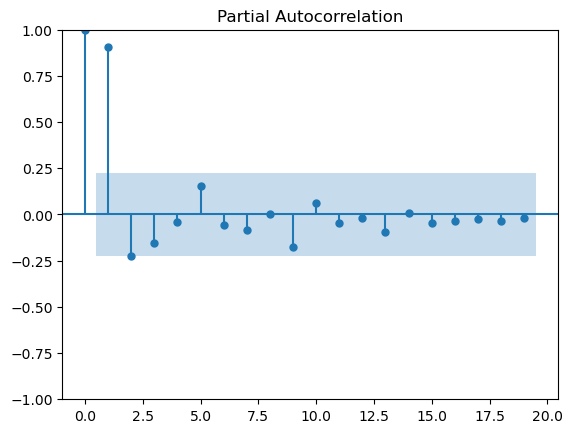

In [87]:
plot_pacf(mean_provision_train, method='ywm');

### Autocorrelation  model

In [88]:
mean_provision_train = mean_provision_train.reset_index()
res = AutoReg(mean_provision_train['trimmed mean'], lags=1).fit()

In [89]:
res.params

const              0.018245
trimmed mean.L1    0.924060
dtype: float64

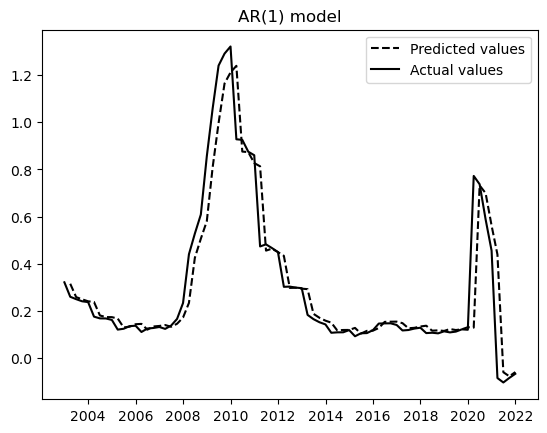

In [90]:
mean_provision_train['Report Date'] = pd.to_datetime(mean_provision_train['Report Date'])

mean_provision_train['predicted vals'] = res.predict(start=0, end=80)
plt.plot(mean_provision_train['Report Date'], mean_provision_train['predicted vals'], 
         '--',color='black', label='Predicted values')
plt.plot(mean_provision_train['Report Date'], mean_provision_train['trimmed mean'], 
         color='black',label='Actual values');
plt.legend()
plt.title('AR(1) model');

### Cross-correlation with macroeconomic regressors

In [91]:
# Estimate AR(1) model residuals
mean_provision_train['residuals'] = mean_provision_train['trimmed mean'] - mean_provision_train['predicted vals']

In [92]:
# Add macro economic indicators
macro_features['Date'] = pd.to_datetime(macro_features['Date'])
data_set = mean_provision_train.merge(macro_features, left_on='Report Date', right_on='Date')
data_set.dropna(inplace=True)

In [93]:
# List of macroeconomic variables to plot
macro_list = [
    'Real GDP growth', 'Real GDP growth_ema3',
    'Nominal GDP growth', 'Nominal GDP growth_ema1.75',
    'Unemployment rate', 'Unemployment rate change',
    '3-month Treasury rate change',
    'BBB corporate yield', 'BBB corporate yield change',
    'Dow Jones Total Stock Market Index change',
    'Commercial Real Estate Price Index change',
    'Market Volatility Index',
    'Market Volatility Index change',
    'Market Volatility Index_ema4',
    'Market Volatility Index change_ema10',
]

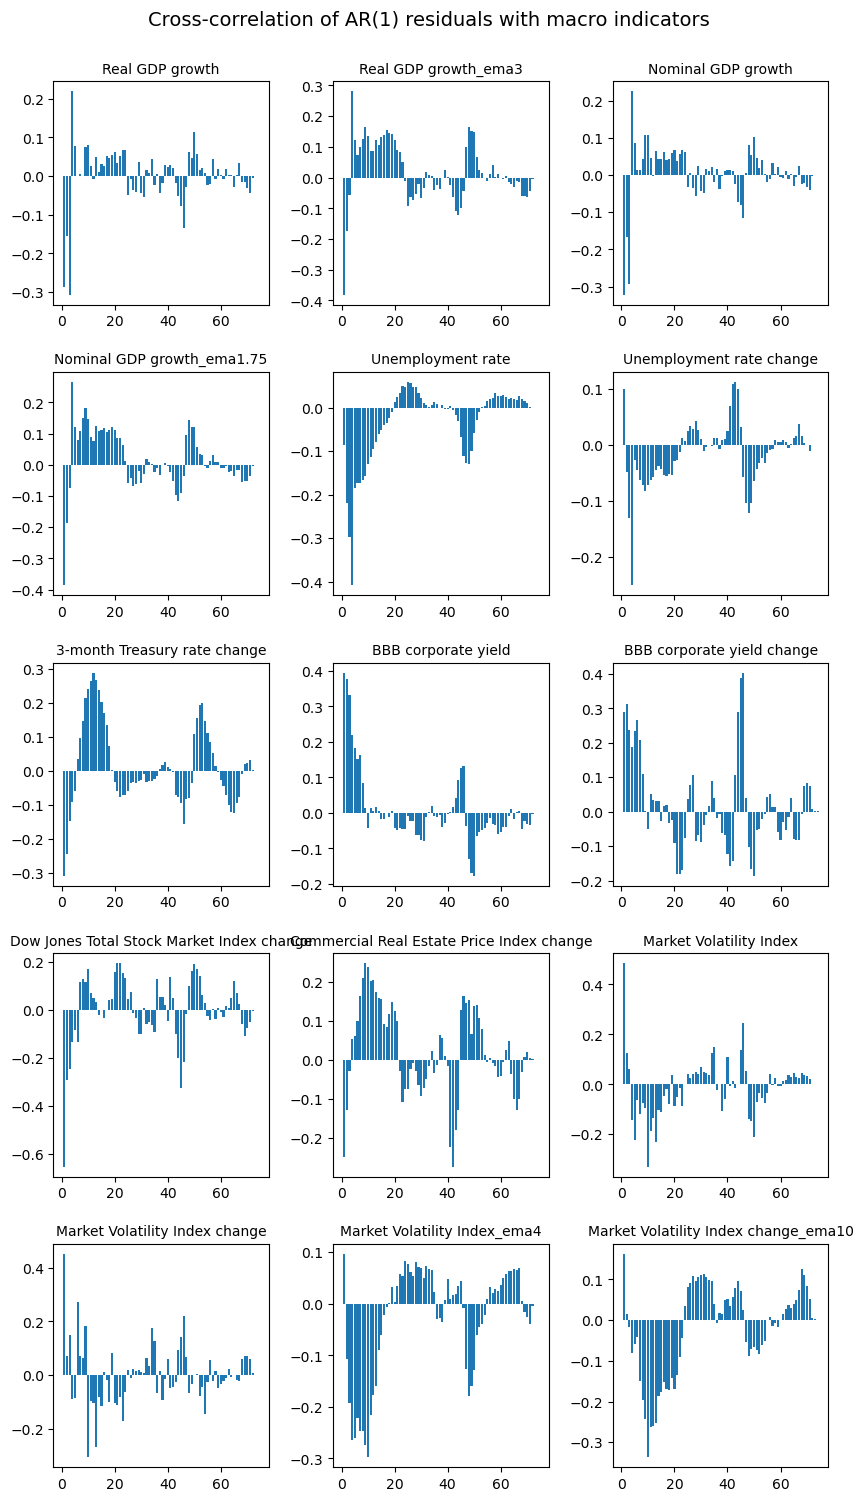

In [94]:
indx=0

fig, axs = plt.subplots(5, 3, figsize=(10,18))
for i in range(5):
    for j in range(3):
        macro_ind = macro_list[indx]
        ccf=sm.tsa.stattools.ccf(data_set['residuals'], data_set[macro_ind], adjusted=False, fft=False)
        axs[i, j].bar(list(range(1, len(ccf)+1)), ccf)
        axs[i, j].set_title(macro_ind, fontsize=10)
        indx += 1

plt.suptitle('Cross-correlation of AR(1) residuals with macro indicators', fontsize=14, y=0.92)

plt.subplots_adjust(wspace=0.3, hspace=0.3)